# 作業
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練  
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢  
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度  

今日百日馬拉松作業 : 注意事項

1. 今日作業記憶體需求較大，請同學執行時記得 shutdown 其他執行中的 .ipynb 檔

2. 提醒同學們今日執行會比較久(幾分鐘到數小時不等)

3. nvidia-smi 指令僅適用於 mac 與 linux 作業系統, windows 無法執行該指令, 但不影響後續程式, 請無法執行的同學忽略即可

In [0]:
import os
import keras

# 請嘗試設定 GPU：os.environ

In [0]:
train, test = keras.datasets.cifar10.load_data()

In [0]:
## 資料前處理
#請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練  
def preproc_x(x, flatten=True):
    x = x.reshape(len(x), -1)
    x = ((x - x.min(axis = 0)) / (x.max(axis = 0) - x.min(axis  = 0))) * 2 - 1
    return x

def preproc_y(y, num_classes = 10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [17]:
#請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢  
def build_mlp(input_shape, output_units=10, num_neurons=[1024, 512, 256, 128, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                4128      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

In [0]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [0]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [20]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 28s 566us/step - loss: 1.7112 - acc: 0.3915 - val_loss: 1.5670 - val_acc: 0.4459
Epoch 2/100
50000/50000 [==============================] - 28s 558us/step - loss: 1.4764 - acc: 0.4815 - val_loss: 1.4362 - val_acc: 0.4898
Epoch 3/100
50000/50000 [==============================] - 28s 556us/step - loss: 1.3531 - acc: 0.5229 - val_loss: 1.4042 - val_acc: 0.5077
Epoch 4/100
50000/50000 [==============================] - 28s 556us/step - loss: 1.2498 - acc: 0.5579 - val_loss: 1.4218 - val_acc: 0.5111
Epoch 5/100
50000/50000 [==============================] - 28s 555us/step - loss: 1.1671 - acc: 0.5891 - val_loss: 1.3491 - val_acc: 0.5305
Epoch 6/100
50000/50000 [==============================] - 28s 556us/step - loss: 1.0688 - acc: 0.6236 - val_loss: 1.3694 - val_acc: 0.5269
Epoch 7/100
50000/50000 [==============================] - 28s 556us/step - loss: 0.9817 - acc: 0.6516 - val_l

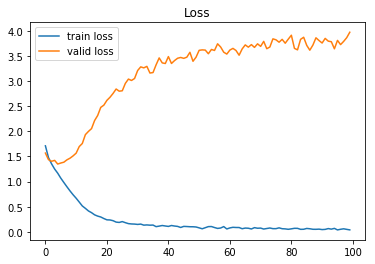

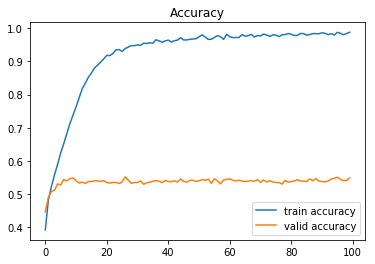

In [21]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

經過**將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間**及**將 mlp 疊更深**，進行訓練後觀察 learning curve 的走勢發現以下：
1. 由於learning curve來說，愈好的訓練模型應該有較小的 loss，以圖來看的確是。  
    但仍需要測量 validation set 和 training set 的 performance 差距，才能準確的評估模型 generalization 的能力。以圖來看，訓練和試驗的loss差距相當大，表示模型泛化能力差。
2. 再加上以accuracy來看，訓練集和試驗集差距太大→overfitting

# 範例重點
學習在模型開始前檢查各個環節  
1. 是否有 GPU 資源
2. 將前處理轉為函式，統一處理訓練、驗證與測試集
3. 將超參數變數化，易於重複使用函式、模型等

In [0]:
## 確認硬體資源 (如果你是在 Linux, 若是在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)
#!nvidia-smi

In [3]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [4]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

W0805 12:58:02.929571 140718708635520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 12:58:02.973438 140718708635520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 12:58:02.983963 140718708635520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [0]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [10]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0805 12:58:14.393944 140718708635520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0805 12:58:14.408891 140718708635520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [11]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0805 12:58:18.024839 140718708635520 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0805 12:58:18.103205 140718708635520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 19s 385us/step - loss: 1.9316 - acc: 0.3042 - val_loss: 1.7555 - val_acc: 0.3756
Epoch 2/100
50000/50000 [==============================] - 13s 266us/step - loss: 1.6991 - acc: 0.3957 - val_loss: 1.6382 - val_acc: 0.4156
Epoch 3/100
50000/50000 [==============================] - 14s 271us/step - loss: 1.6147 - acc: 0.4228 - val_loss: 1.5741 - val_acc: 0.4475
Epoch 4/100
50000/50000 [==============================] - 14s 273us/step - loss: 1.5394 - acc: 0.4519 - val_loss: 1.5117 - val_acc: 0.4634
Epoch 5/100
50000/50000 [==============================] - 14s 272us/step - loss: 1.4999 - acc: 0.4664 - val_loss: 1.5298 - val_acc: 0.4579
Epoch 6/100
50000/50000 [==============================] - 13s 267us/step - loss: 1.4704 - acc: 0.4747 - val_loss: 1.4619 - val_acc: 0.4801
Epoch 7/100
50000/50000 [==============================] - 13s 263us/step - loss: 1.4334 - acc: 0.4887 - val_l

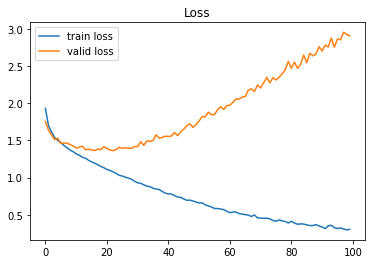

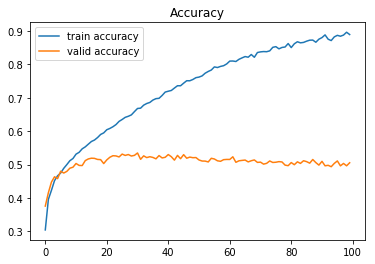

In [12]:
# 訓練模型並檢視驗證集的結果
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

參考資料

  - [選擇 GPU 裝置與僅使用部分 GPU 的設定方式](https://github.com/vashineyu/slides_and_others/blob/master/tutorial/gpu_usage.pdf)  
  - [養成良好 Coding Style: Python Coding Style – PEP8](https://www.python.org/dev/peps/pep-0008/)   
  - [Troubleshooting Deep Neural Network – A Field Guide to Fix your Model](http://josh-tobin.com/assets/pdf/troubleshooting-deep-neural-networks-01-19.pdf)